In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("augmented_GSR_ECG_EEG_DATA(CTGAN).csv")

In [3]:
df

,subject_id,case_id,label_Arousal,label_Valence,Label,Labell,GSR_0,GSR_1,GSR_2,GSR_3,...,EEG_78,EEG_79,EEG_80,EEG_81,EEG_82,EEG_83,EEG_84,EEG_85,EEG_86,EEG_87
0,0,0,1,1,HAHV,3,-0.277512,-0.029699,-0.446231,0.361831,...,-0.411472,-0.619955,-0.135081,-0.132510,0.860934,0.027133,0.490970,1.337359,-0.025029,1.120726
1,0,1,1,1,HAHV,3,-0.304174,1.088844,0.251643,0.253233,...,-0.412092,0.070994,-0.053708,-0.237470,0.509355,0.026983,1.307456,0.468313,0.447794,0.319481
2,0,2,-1,1,LAHV,1,-0.273032,-1.803324,0.034562,-0.469988,...,-0.412283,0.016873,-0.077167,0.004746,0.287991,0.031422,0.590245,2.206405,0.058303,1.521349
3,0,3,1,-1,HALV,2,-0.245539,-0.498300,-0.308101,0.120249,...,-0.412052,-0.591872,-0.178766,0.820206,2.742531,0.027683,0.900226,-0.835257,0.814336,-0.882388
4,0,4,1,1,HAHV,3,-0.272976,0.069360,0.587133,-0.593375,...,-0.409223,0.136497,-0.078865,0.150075,-0.350059,0.006795,0.977215,0.468313,-0.007352,0.720103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147,60,0,-1,-1,LALV,0,0.106004,4.595566,0.377207,-0.883623,...,-0.609669,1.693332,0.048878,-2.578984,-1.657770,10.008252,-0.571065,-1.025854,-1.480611,-1.557190
4148,69,28,-1,-1,LALV,0,0.517039,-0.127010,0.367402,-1.839187,...,0.047088,-0.751995,0.437553,-0.938379,-0.913061,-2.264056,-1.841320,-0.744898,2.654817,-1.162691
4149,71,4,-1,-1,LALV,0,0.092026,2.086575,7.079178,-2.130997,...,-1.455639,4.053909,0.158870,-2.491957,-1.258471,12.425953,-0.638952,-0.528315,0.025505,-0.312077
4150,73,39,-1,-1,LALV,0,1.266645,4.263907,-0.291832,-2.310832,...,-0.457951,4.011472,0.310096,-3.449309,-2.113650,9.760149,-1.639210,-1.061141,-0.263464,-0.851110


In [4]:
# distributing the dataset into two components X and Y
X = df.iloc[:, 6:105].values

In [5]:
X

array([[-0.27751245, -0.02969867, -0.44623097, ...,  0.94661264,
         0.07743937,  0.8189292 ],
       [-0.30417424,  1.08884353,  0.25164327, ...,  0.58898326,
         0.72115833,  0.48159414],
       [-0.27303202, -1.80332428,  0.03456197, ...,  1.30424203,
         0.24581004,  1.15626427],
       ...,
       [ 0.09202605,  2.08657468,  7.07917814, ..., -1.57036785,
         0.65951658, -1.734643  ],
       [ 1.26664476,  4.26390743, -0.29183218, ..., -1.6965403 ,
         0.6580191 , -1.68265812],
       [ 0.26952264,  1.0581689 ,  0.860568  , ...,  1.10481873,
        -0.47166773, -1.37229874]])

In [6]:
y = df.iloc[:, 5].values

In [7]:
y

array([3, 3, 1, ..., 0, 0, 0], dtype=int64)

In [8]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X = sc.fit_transform(X)

In [9]:
# Splitting the X and Y into the
# Training set and Testing set
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


#for i in range(0,100):

 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)
#pca = PCA(n_components = 50)
#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)
classifier = DecisionTreeClassifier(random_state=0, max_depth=2)
classifier.fit(X_train, y_train)
#classifier = SVC(kernel='linear')
#classifier.fit(X_train, y_train)    
y_pred = classifier.predict(X_test)
    
accuracy = accuracy_score(y_test, y_pred)
    #print('Accuracy: %f' % accuracy)
    # precision tp / (tp + fp)
precision = precision_score(y_test, y_pred,average='micro')
    #print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='micro')
    #print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred,  average='micro')
print(accuracy,",",precision,",",recall,",",f1,",")

0.6195826645264848 , 0.6195826645264848 , 0.6195826645264848 , 0.6195826645264848 ,


In [10]:
# making confusion matrix between
#  test set of Y and predicted value.
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred)
cm

array([[264,   2,   1,  65],
       [ 13, 199,   0,  93],
       [ 26,  10,  20, 244],
       [ 15,   5,   0, 289]], dtype=int64)

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Precision: %.3f' % precision_score(y_test, y_pred, average='micro')) 
print('Recall: %.3f' % recall_score(y_test, y_pred, average='micro'))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1:%.3f'% f1_score(y_test, y_pred,  average='micro'))

Precision: 0.620
Recall: 0.620
Accuracy: 0.620
F1:0.620


In [12]:
import numpy as np
cm=np.transpose( np.transpose(cm) / cm.astype(np.float).sum(axis=1) )

In [13]:
cm

array([[0.79518072, 0.0060241 , 0.00301205, 0.19578313],
       [0.04262295, 0.65245902, 0.        , 0.30491803],
       [0.08666667, 0.03333333, 0.06666667, 0.81333333],
       [0.04854369, 0.01618123, 0.        , 0.93527508]])

In [14]:
cm = pd.DataFrame(cm,
                     index = ['LAHV','LALV','HAHV','HALV'], 
                     columns = ['LAHV','LALV','HAHV','HALV'])

In [15]:
cm

,LAHV,LALV,HAHV,HALV
LAHV,0.795181,0.006024,0.003012,0.195783
LALV,0.042623,0.652459,0.000000,0.304918
HAHV,0.086667,0.033333,0.066667,0.813333
HALV,0.048544,0.016181,0.000000,0.935275


In [16]:
y_test

array([2, 1, 0, ..., 2, 2, 3], dtype=int64)

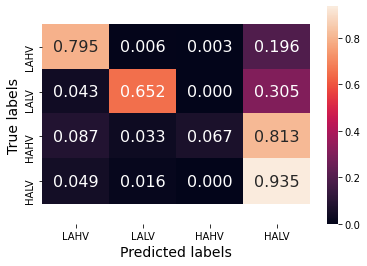

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
ax=sns.heatmap(cm, annot=True, fmt="0.3f", annot_kws={"size": 16})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.45, top-0.4)
plt.xlabel("Predicted labels", fontsize=14)
plt.ylabel("True labels", fontsize=14)
#plt.figure(figsize=(10,7))
#plt.savefig("hmwscalingall.png", dpi=300)
plt.show()